In [1]:
!pip install --upgrade face_recognition
!pip install --upgrade opencv-python

     |████████████████████████████████| 100.2MB 1.3MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566176 sha256=dabc2ca769f1c71bcd0be159fb57b41ddfcb88f48302c89e2c081efea1a53ea8
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
     |████████████████████████████████| 28.7MB 34.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


In [4]:
import face_recognition
import cv2
import numpy

from IPython.display import display, Javascript, Image, clear_output
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import urllib

!wget -O me.jpg 'https://media.licdn.com/dms/image/C4D03AQHDsuwJf6rX0w/profile-displayphoto-shrink_200_200/0?e=1574899200&v=beta&t=Ny70D9QQIWbtkZGngLPn2yPih10tf0W-m6qwHM3NtXQ'
!ls -la

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = numpy.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)

  return image

eu_image = face_recognition.load_image_file("me.jpg")
eu_face_encoding = face_recognition.face_encodings(eu_image)[0]

known_face_encodings = [
    eu_face_encoding,
]
known_face_names = [
    "Matheus",
]

--2019-09-26 21:53:21--  https://media.licdn.com/dms/image/C4D03AQHDsuwJf6rX0w/profile-displayphoto-shrink_200_200/0?e=1574899200&v=beta&t=Ny70D9QQIWbtkZGngLPn2yPih10tf0W-m6qwHM3NtXQ
Resolving media.licdn.com (media.licdn.com)... 2.21.40.86, 2a02:26f0:e3:385::25ea, 2a02:26f0:e3:3b0::25ea
Connecting to media.licdn.com (media.licdn.com)|2.21.40.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11430 (11K) [image/jpeg]
Saving to: ‘me.jpg’

me.jpg              100%[===================>]  11.16K  --.-KB/s    in 0s      

2019-09-26 21:53:21 (110 MB/s) - ‘me.jpg’ saved [11430/11430]

total 28
drwxr-xr-x 1 root root  4096 Sep 26 21:52 .
drwxr-xr-x 1 root root  4096 Sep 26 21:43 ..
drwxr-xr-x 1 root root  4096 Sep 18 16:07 .config
-rw-r--r-- 1 root root 11430 Sep 26 21:53 me.jpg
drwxr-xr-x 1 root root  4096 Aug 27 16:17 sample_data


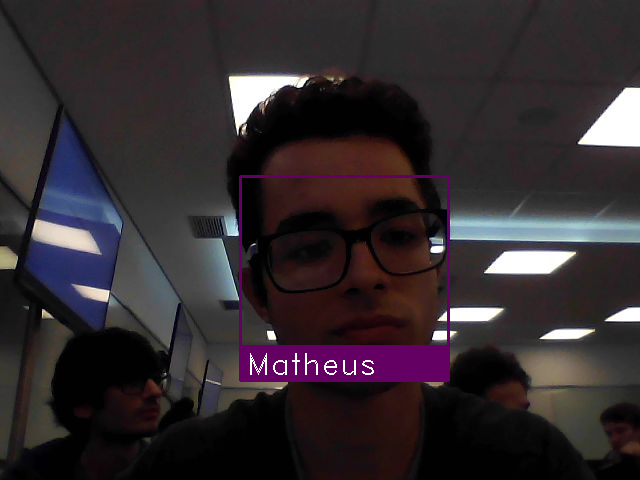

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [5]:
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True
first = True

filename = 'result.jpg'
scale = 4

while True:
    frame = take_photo()
    small_frame = cv2.resize(frame, (0, 0), fx=1/scale, fy=1/scale)
    rgb_small_frame = small_frame[:, :, ::-1]
    
    if process_this_frame:
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Homossexual"

            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = numpy.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    for (top, right, bottom, left), name in zip(face_locations, face_names):
        top *= scale
        right *= scale
        bottom *= scale
        left *= scale

        cv2.rectangle(frame, (left, top), (right, bottom), (100, 0, 100), 2)

        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (100, 0, 100), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
        
    clear_output()
    cv2_imshow(frame)
